# Supervised Learning for Sarcasm Detection in Headlines: An NLP Approach

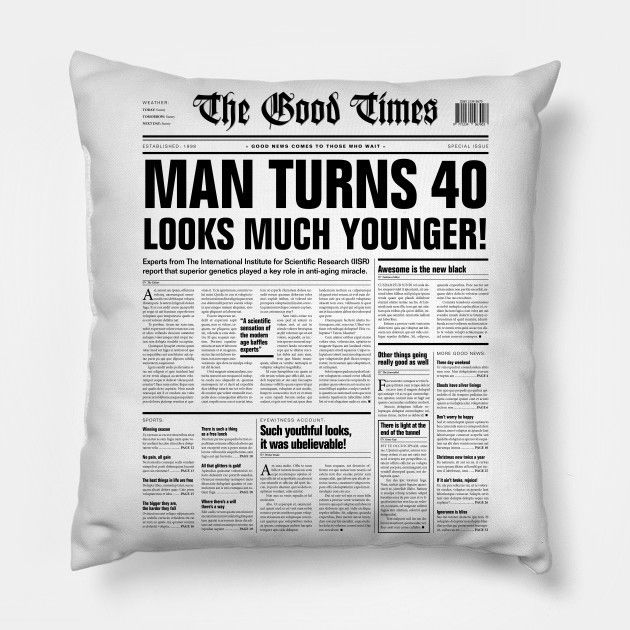

**Natural Language Processing (NLP) is a field of artificial intelligence that focuses on the interaction between computers and human languages. It involves developing algorithms and systems that can analyze, understand, and generate human language, enabling computers to communicate with humans in a more natural and intuitive way. NLP techniques are used in a wide range of applications, including language translation, text summarization, dialogue systems, and sentiment analysis. In this Case Study, We will see how NLP will help in Headline Sarcastic Detection**

## Objective: To develop a machine learning model that can accurately identify sarcastic headlines in a given dataset, using natural language processing techniques and supervised learning

## Import All Necessary Libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import string
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout,Bidirectional,GRU
import tensorflow as tf

## Load The Train Dataset

In [26]:
url_df = 'https://drive.google.com/file/d/1PtnNz5st_wyscND6oleXPBFGTK8I8K4f/view?usp=sharing'
path_df = 'https://drive.google.com/uc?export=download&id='+url_df.split('/')[-2]
train = pd.read_csv(path_df)

In [27]:
train

,headline,is_sarcastic
0,supreme court votes 7-2 to legalize all worldl...,1
1,hungover man horrified to learn he made dozens...,1
2,emily's list founder: women are the 'problem s...,0
3,send your kids back to school with confidence,0
4,watch: experts talk pesticides and health,0
...,...,...
44257,greece seeks to reassure europe as tensions rise,0
44258,vatican says transgender man cannot become a g...,0
44259,protesters ejected from donald trump rally aft...,0
44260,italian recipes that are oldies but goodies,0


In [28]:
train.shape

(44262, 2)

## Handling Duplicated Values

In [29]:
train[train.duplicated(['headline'])]

,headline,is_sarcastic
309,millions of kids might lose health care becaus...,0
346,see chris hemsworth in his 'ghostbusters' uniform,0
397,usa original movie not that original,1
554,"trump excels at business, but he has no busine...",0
607,the best way to eat avocados: avocado pasta,0
...,...,...
44257,greece seeks to reassure europe as tensions rise,0
44258,vatican says transgender man cannot become a g...,0
44259,protesters ejected from donald trump rally aft...,0
44260,italian recipes that are oldies but goodies,0


**There are 17204 duplicate values in columne headline**

## Removing Duplicate Values and Keep Only the Last Values

In [30]:
train.drop_duplicates(subset="headline",
                     keep='last', inplace=True)

In [31]:
train.shape

(27058, 2)

After removing duplicate values, there are 27058 rows left

## Use All Lowercase

In [32]:
train['headline'] = train['headline'].str.lower()
train

,headline,is_sarcastic
8,report: there still time to convert to christi...,1
9,education reform and evidence,0
15,the new new net neutrality,0
27,confused zoo officials awkwardly celebrate aft...,1
28,lauren graham just dropped a clue about those ...,0
...,...,...
44257,greece seeks to reassure europe as tensions rise,0
44258,vatican says transgender man cannot become a g...,0
44259,protesters ejected from donald trump rally aft...,0
44260,italian recipes that are oldies but goodies,0


## Cleaning The Text

In [33]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [35]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

# Remove Accented Chars
def remove_accented_chars_func(text):
    '''
    Removes all accented characters from a string, if present
    
    Args:
        text (str): String to which the function is to be applied, string
    
    Returns:
        Clean string without accented characters
    '''
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
# Remove punctuation
def remove_punctuation_func(text):
    '''
    Removes all punctuation from a string, if present
    
    Args:
        text (str): String to which the function is to be applied, string
    
    Returns:
        Clean string without punctuations
    '''
    return re.sub(r'[^a-zA-Z0-9]', ' ', text)
# Remove Irrelevant Char
def remove_irr_char_func(text):
    '''
    Removes all irrelevant characters (numbers and punctuation) from a string, if present
    
    Args:
        text (str): String to which the function is to be applied, string
    
    Returns:
        Clean string without irrelevant characters
    '''
    return re.sub(r'[^a-zA-Z]', ' ', text)
#Remove Whitespaces
def remove_extra_whitespaces_func(text):
    '''
    Removes extra whitespaces from a string, if present
    
    Args:
        text (str): String to which the function is to be applied, string
    
    Returns:
        Clean string without extra whitespaces
    ''' 
    return re.sub(r'^\s*|\s\s*', ' ', text).strip()
#lemmatization
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    text=remove_accented_chars_func(text)
    text=remove_punctuation_func(text)
    text=remove_irr_char_func(text)
    text=remove_extra_whitespaces_func(text)
    return text
#Apply function on review column
train['headline']=train['headline'].apply(denoise_text)

train

,headline,is_sarcastic
8,report still time convert christianity christm...,1
9,education reform evidence,0
15,new new net neutrality,0
27,confused zoo officials awkwardly celebrate end...,1
28,lauren graham dropped clue final gilmore girls...,0
...,...,...
44257,greece seeks reassure europe tensions rise,0
44258,vatican says transgender man cannot become god...,0
44259,protesters ejected donald trump rally holding ...,0
44260,italian recipes oldies goodies,0


## Lemmatization

In [36]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [37]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
  words = text.split()
  words = [lemmatizer.lemmatize(word,pos='v') for word in words]
  return ' '.join(words)
train['headline'] = train['headline'].apply(lemmatize_words)

train

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,headline,is_sarcastic
8,report still time convert christianity christm...,1
9,education reform evidence,0
15,new new net neutrality,0
27,confuse zoo officials awkwardly celebrate enda...,1
28,lauren graham drop clue final gilmore girls word,0
...,...,...
44257,greece seek reassure europe tensions rise,0
44258,vatican say transgender man cannot become godp...,0
44259,protesters eject donald trump rally hold pocke...,0
44260,italian recipes oldies goodies,0


## Checking Out Datatype

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27058 entries, 8 to 44261
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   headline      27058 non-null  object
 1   is_sarcastic  27058 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 634.2+ KB


# Exploratory Data Analysis (EDA)

In [39]:
train2=train.copy()

## Changing Is Sarcastic Column With Yes & No

In [40]:
train2['is_sarcastic'] = train['is_sarcastic'].map({1:'yes' ,0:'no'})

## How Many Headlines Are Considered Sarcastic

In [41]:
train2['is_sarcastic'].value_counts()

no     14358
yes    12700
Name: is_sarcastic, dtype: int64

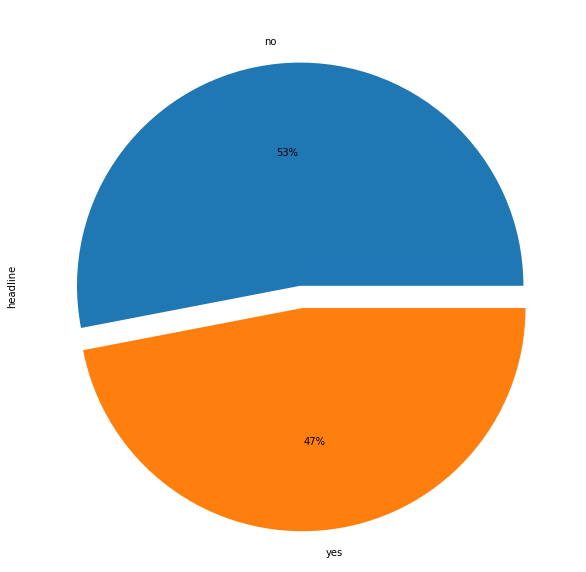

In [42]:
train2.groupby('is_sarcastic')['headline'].nunique().plot.pie(explode=[0,0.1],figsize=(10,20),autopct='%1.0f%%')
plt.show()

There are 12700 headlines considered Sarcastic or 47% headlines are sarcastic

## What Words Mostly Appeared in Sarcastic Headline?

In [43]:
from wordcloud import WordCloud,STOPWORDS

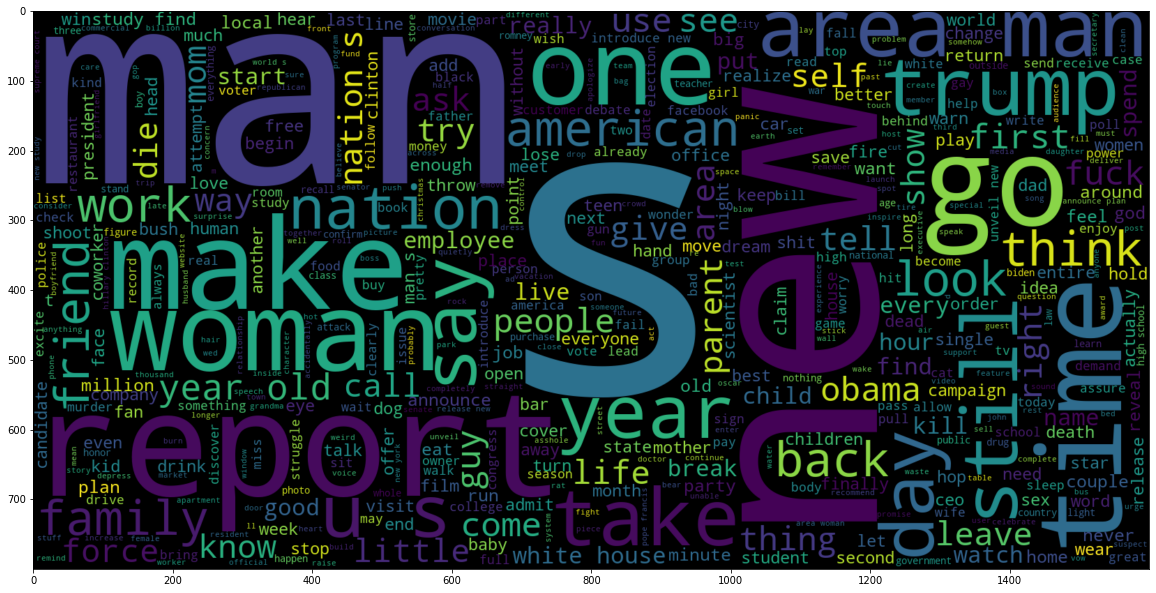

In [44]:
plt.figure(figsize = (20,20)) # Text that is Sarcastic
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(train[train.is_sarcastic == 1].headline))
plt.imshow(wc , interpolation = 'bilinear')

# Prediction Model For Sarcastic Headline Detection

## Define The Features (X)

In [45]:
X=train['headline']
X

8        report still time convert christianity christm...
9                                education reform evidence
15                                  new new net neutrality
27       confuse zoo officials awkwardly celebrate enda...
28        lauren graham drop clue final gilmore girls word
                               ...                        
44257            greece seek reassure europe tensions rise
44258    vatican say transgender man cannot become godp...
44259    protesters eject donald trump rally hold pocke...
44260                       italian recipes oldies goodies
44261    area loser blissfully unaffected whims stock m...
Name: headline, Length: 27058, dtype: object

## Define The Lable (Target)

In [46]:
y=train['is_sarcastic']
y

8        1
9        0
15       0
27       1
28       0
        ..
44257    0
44258    0
44259    0
44260    0
44261    1
Name: is_sarcastic, Length: 27058, dtype: int64

## Preprocessing By Vectorization

In [47]:
vectorizer=TfidfVectorizer(strip_accents='unicode',
                           analyzer='word',
                           ngram_range=(1, 2),
                           max_features=15000,
                           smooth_idf=True,
                           sublinear_tf=True)

vectorizer.fit(train["headline"])
X = vectorizer.transform(train["headline"])

In [48]:
X.shape

(27058, 15000)

## Split The Train Data into Train and Test Data

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

## Logistic Regression

In [50]:
lr = LogisticRegression(C=1, random_state=42, solver='liblinear')

In [51]:
lr.fit(X_train,y_train)
predictions1 = lr.predict(X_test)

print(classification_report(y_test, predictions1))
pd.DataFrame(confusion_matrix(y_test, predictions1))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      3613
           1       0.81      0.74      0.77      3152

    accuracy                           0.80      6765
   macro avg       0.80      0.79      0.80      6765
weighted avg       0.80      0.80      0.80      6765



,0,1
0,3061,552
1,818,2334


## K Nearest Neighbor

In [52]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
predictions2 = knn.predict(X_test)
print(classification_report(y_test, predictions2))
pd.DataFrame(confusion_matrix(y_test, predictions2))


              precision    recall  f1-score   support

           0       0.54      0.92      0.68      3613
           1       0.52      0.09      0.16      3152

    accuracy                           0.54      6765
   macro avg       0.53      0.51      0.42      6765
weighted avg       0.53      0.54      0.44      6765



,0,1
0,3339,274
1,2858,294


## Decision Tree

In [53]:
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)
predictions3 = dt.predict(X_test)
print(classification_report(y_test, predictions3))
pd.DataFrame(confusion_matrix(y_test, predictions3))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      3613
           1       0.69      0.69      0.69      3152

    accuracy                           0.71      6765
   macro avg       0.71      0.71      0.71      6765
weighted avg       0.71      0.71      0.71      6765



,0,1
0,2622,991
1,975,2177


## Random Forest

In [54]:
rfs=RandomForestClassifier()
rfs.fit(X_train,y_train)
predictions4 = rfs.predict(X_test)
print(classification_report(y_test, predictions4))
pd.DataFrame(confusion_matrix(y_test, predictions4))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78      3613
           1       0.76      0.71      0.73      3152

    accuracy                           0.76      6765
   macro avg       0.76      0.76      0.76      6765
weighted avg       0.76      0.76      0.76      6765



,0,1
0,2922,691
1,929,2223


Based on trained model above Logistic Regression shows high accuracy of 84%, Hence for the test data will use Logistic Regression

## Loading Test Data

In [55]:
test_df = 'https://drive.google.com/file/d/1Aw3uflDgYAgsIT4BPUARrmGIpLv96VYv/view?usp=sharing'
path_test_df = 'https://drive.google.com/uc?export=download&id='+test_df.split('/')[-2]
test = pd.read_csv(path_test_df)

In [67]:
test

,headline
0,area stand-up comedian questions the deal with...
1,dozens of glowing exit signs mercilessly taunt...
2,perfect response to heckler somewhere in prop ...
3,gop prays for ossoff lossoff
4,trevor noah says the scary truth about trump's...
...,...
11061,house conservatives claim democrats have faile...
11062,area man having one of his little bursts of en...
11063,there is nothing libertarian about conservatives
11064,mike pompeo startled after seeing 'beware of h...


,headline,is_sarcastic
1,dozens of glowing exit signs mercilessly taunt...,no
2,perfect response to heckler somewhere in prop ...,yes
3,gop prays for ossoff lossoff,no
5,israeli pm debuts new road map for continued s...,no
6,"after careful thought, teen applies to college...",no
...,...,...
11061,house conservatives claim democrats have faile...,no
11062,area man having one of his little bursts of en...,no
11063,there is nothing libertarian about conservatives,no
11064,mike pompeo startled after seeing 'beware of h...,no


## Handling Duplicated Values

In [57]:
test.shape

(11066, 1)

In [58]:
test[test.duplicated(['headline'])]

,headline
450,poll: 85% of americans would like to see candi...
602,here's what science says about the connection ...
797,sweatshop laborer's child loves her irregular ...
857,this lesbian is considered a father in indiana...
995,ohio state uses t-shirt blaster to pass out di...
...,...
11051,man has no idea what to do with good mood
11053,why starting a company is a crazy thing
11056,"after ireland, the pressure is on italy to leg..."
11057,trendy restaurant has communal napkin


## Removing Duplicate Values from Headline Column

In [59]:
test.drop_duplicates(subset="headline",
                     keep='last', inplace=True)

In [60]:
test.shape

(9979, 1)

In [61]:
Xnew=test['headline']

## Test Data Preprocessing With Vectorization

In [62]:
Xnew = vectorizer.fit_transform(Xnew)
Xnew.shape

(9979, 15000)

## Predict the Test Data with Trained Logistic Regression Model

## Predicted Sarcastic Headline

In [63]:
test['is_sarcastic']=lr.predict(Xnew)

In [64]:
test

,headline,is_sarcastic
1,dozens of glowing exit signs mercilessly taunt...,0
2,perfect response to heckler somewhere in prop ...,1
3,gop prays for ossoff lossoff,0
5,israeli pm debuts new road map for continued s...,0
6,"after careful thought, teen applies to college...",0
...,...,...
11061,house conservatives claim democrats have faile...,0
11062,area man having one of his little bursts of en...,0
11063,there is nothing libertarian about conservatives,0
11064,mike pompeo startled after seeing 'beware of h...,0


## Convert Is Sarcastic Column to Yes & No

In [65]:
test['is_sarcastic'] = test['is_sarcastic'].map({1:'yes' ,0:'no'})

In [66]:
test

,headline,is_sarcastic
1,dozens of glowing exit signs mercilessly taunt...,no
2,perfect response to heckler somewhere in prop ...,yes
3,gop prays for ossoff lossoff,no
5,israeli pm debuts new road map for continued s...,no
6,"after careful thought, teen applies to college...",no
...,...,...
11061,house conservatives claim democrats have faile...,no
11062,area man having one of his little bursts of en...,no
11063,there is nothing libertarian about conservatives,no
11064,mike pompeo startled after seeing 'beware of h...,no
